In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.2f}'.format
sns.set_style('darkgrid')

# Time Series (Hotel Booking)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.tsa.api as sm
from statsmodels.tsa.stattools import adfuller
import statsmodels.tsa.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Text Analytics (Bag of Wrods)
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

import sklearn.feature_extraction.text as sk_txt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score

# Text Analytics
# Real-world dataset: Political Social Media

In [2]:
# UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 2127: invalid start byte

df_ts = pd.read_csv('political_social_media.csv', encoding='iso-8859-1')

In [3]:
df_ts.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,audience,audience:confidence,bias,bias:confidence,message,...,orig__golden,audience_gold,bias_gold,bioid,embed,id,label,message_gold,source,text
0,766192484,False,finalized,1,8/4/15 21:17,national,1.00,partisan,1.00,policy,...,NaN,NaN,NaN,R000596,"<blockquote class=""twitter-tweet"" width=""450"">...",3.83249E+17,From: Trey Radel (Representative from Florida),NaN,twitter,RT @nowthisnews: Rep. Trey Radel (R- #FL) slam...
1,766192485,False,finalized,1,8/4/15 21:20,national,1.00,partisan,1.00,attack,...,NaN,NaN,NaN,M000355,"<blockquote class=""twitter-tweet"" width=""450"">...",3.11208E+17,From: Mitch McConnell (Senator from Kentucky),NaN,twitter,VIDEO - #Obamacare: Full of Higher Costs and ...
2,766192486,False,finalized,1,8/4/15 21:14,national,1.00,neutral,1.00,support,...,NaN,NaN,NaN,S001180,"<blockquote class=""twitter-tweet"" width=""450"">...",3.39069E+17,From: Kurt Schrader (Representative from Oregon),NaN,twitter,Please join me today in remembering our fallen...
3,766192487,False,finalized,1,8/4/15 21:08,national,1.00,neutral,1.00,policy,...,NaN,NaN,NaN,C000880,"<blockquote class=""twitter-tweet"" width=""450"">...",2.98528E+17,From: Michael Crapo (Senator from Idaho),NaN,twitter,RT @SenatorLeahy: 1st step toward Senate debat...
4,766192488,False,finalized,1,8/4/15 21:26,national,1.00,partisan,1.00,policy,...,NaN,NaN,NaN,U000038,"<blockquote class=""twitter-tweet"" width=""450"">...",4.07643E+17,From: Mark Udall (Senator from Colorado),NaN,twitter,.@amazon delivery #drones show need to update ...


In [4]:
df_ts.shape

(5000, 21)

In [5]:
df_ts.describe()

,_unit_id,_trusted_judgments,audience:confidence,bias:confidence,message:confidence,orig__golden,audience_gold,bias_gold,message_gold
count,5000.00,5000.00,5000.00,5000.00,5000.00,0.00,0.00,0.00,0.00
mean,766194985.16,1.03,1.00,0.99,1.00,NaN,NaN,NaN,NaN
std,1444.06,0.18,0.05,0.05,0.04,NaN,NaN,NaN,NaN
min,766192484.00,1.00,0.51,0.50,0.50,NaN,NaN,NaN,NaN
25%,766193734.75,1.00,1.00,1.00,1.00,NaN,NaN,NaN,NaN
50%,766194985.50,1.00,1.00,1.00,1.00,NaN,NaN,NaN,NaN
75%,766196235.25,1.00,1.00,1.00,1.00,NaN,NaN,NaN,NaN
max,766197486.00,3.00,1.00,1.00,1.00,NaN,NaN,NaN,NaN


In [6]:
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   _unit_id             5000 non-null   int64  
 1   _golden              5000 non-null   bool   
 2   _unit_state          5000 non-null   object 
 3   _trusted_judgments   5000 non-null   int64  
 4   _last_judgment_at    5000 non-null   object 
 5   audience             5000 non-null   object 
 6   audience:confidence  5000 non-null   float64
 7   bias                 5000 non-null   object 
 8   bias:confidence      5000 non-null   float64
 9   message              5000 non-null   object 
 10  message:confidence   5000 non-null   float64
 11  orig__golden         0 non-null      float64
 12  audience_gold        0 non-null      float64
 13  bias_gold            0 non-null      float64
 14  bioid                5000 non-null   object 
 15  embed                5000 non-null   o

In [7]:
df_ts.columns.tolist()

['_unit_id',
 '_golden',
 '_unit_state',
 '_trusted_judgments',
 '_last_judgment_at',
 'audience',
 'audience:confidence',
 'bias',
 'bias:confidence',
 'message',
 'message:confidence',
 'orig__golden',
 'audience_gold',
 'bias_gold',
 'bioid',
 'embed',
 'id',
 'label',
 'message_gold',
 'source',
 'text']

In [8]:
# The missing values will not affect the analysis
df_ts.isna().sum()

_unit_id                  0
_golden                   0
_unit_state               0
_trusted_judgments        0
_last_judgment_at         0
audience                  0
audience:confidence       0
bias                      0
bias:confidence           0
message                   0
message:confidence        0
orig__golden           5000
audience_gold          5000
bias_gold              5000
bioid                     0
embed                     0
id                        0
label                     0
message_gold           5000
source                    0
text                      0
dtype: int64

In [9]:
# We will convert the Date & Time to 'datetime64'
df_ts['_last_judgment_at'].describe()

count            5000
unique            238
top       8/5/15 6:05
freq               60
Name: _last_judgment_at, dtype: object

In [10]:
# Rename '_last_judgment_at' to judgment_timestamp for redability

df_ts = df_ts.rename(columns={'_last_judgment_at': 'judgment_timestamp'})
df_ts.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,judgment_timestamp,audience,audience:confidence,bias,bias:confidence,message,...,orig__golden,audience_gold,bias_gold,bioid,embed,id,label,message_gold,source,text
0,766192484,False,finalized,1,8/4/15 21:17,national,1.00,partisan,1.00,policy,...,NaN,NaN,NaN,R000596,"<blockquote class=""twitter-tweet"" width=""450"">...",3.83249E+17,From: Trey Radel (Representative from Florida),NaN,twitter,RT @nowthisnews: Rep. Trey Radel (R- #FL) slam...
1,766192485,False,finalized,1,8/4/15 21:20,national,1.00,partisan,1.00,attack,...,NaN,NaN,NaN,M000355,"<blockquote class=""twitter-tweet"" width=""450"">...",3.11208E+17,From: Mitch McConnell (Senator from Kentucky),NaN,twitter,VIDEO - #Obamacare: Full of Higher Costs and ...
2,766192486,False,finalized,1,8/4/15 21:14,national,1.00,neutral,1.00,support,...,NaN,NaN,NaN,S001180,"<blockquote class=""twitter-tweet"" width=""450"">...",3.39069E+17,From: Kurt Schrader (Representative from Oregon),NaN,twitter,Please join me today in remembering our fallen...
3,766192487,False,finalized,1,8/4/15 21:08,national,1.00,neutral,1.00,policy,...,NaN,NaN,NaN,C000880,"<blockquote class=""twitter-tweet"" width=""450"">...",2.98528E+17,From: Michael Crapo (Senator from Idaho),NaN,twitter,RT @SenatorLeahy: 1st step toward Senate debat...
4,766192488,False,finalized,1,8/4/15 21:26,national,1.00,partisan,1.00,policy,...,NaN,NaN,NaN,U000038,"<blockquote class=""twitter-tweet"" width=""450"">...",4.07643E+17,From: Mark Udall (Senator from Colorado),NaN,twitter,.@amazon delivery #drones show need to update ...


In [11]:
# Converting Dtype from 'object' to 'datetime64' to ensure accurate predictions on time series

df_ts['judgment_timestamp'] = pd.to_datetime(df_ts['judgment_timestamp'])
df_ts['judgment_timestamp'].head()

0   2015-08-04 21:17:00
1   2015-08-04 21:20:00
2   2015-08-04 21:14:00
3   2015-08-04 21:08:00
4   2015-08-04 21:26:00
Name: judgment_timestamp, dtype: datetime64[ns]

In [12]:
# Set index Date and Time
df_ts.set_index('judgment_timestamp', inplace=True)

In [13]:
df_ts.index

DatetimeIndex(['2015-08-04 21:17:00', '2015-08-04 21:20:00',
               '2015-08-04 21:14:00', '2015-08-04 21:08:00',
               '2015-08-04 21:26:00', '2015-08-04 21:06:00',
               '2015-08-04 21:07:00', '2015-08-04 20:51:00',
               '2015-08-04 20:57:00', '2015-08-04 21:14:00',
               ...
               '2015-08-05 05:12:00', '2015-08-05 04:59:00',
               '2015-08-05 05:36:00', '2015-08-05 05:45:00',
               '2015-08-05 05:39:00', '2015-08-05 06:05:00',
               '2015-08-05 05:57:00', '2015-08-05 05:10:00',
               '2015-08-05 06:08:00', '2015-08-05 05:04:00'],
              dtype='datetime64[ns]', name='judgment_timestamp', length=5000, freq=None)

In [14]:
df_ts.index.shape

(5000,)

In [15]:
df_ts.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,audience,audience:confidence,bias,bias:confidence,message,message:confidence,orig__golden,audience_gold,bias_gold,bioid,embed,id,label,message_gold,source,text
judgment_timestamp,,,,,,,,,,,,,,,,,,,,
2015-08-04 21:17:00,766192484,False,finalized,1,national,1.00,partisan,1.00,policy,1.00,NaN,NaN,NaN,R000596,"<blockquote class=""twitter-tweet"" width=""450"">...",3.83249E+17,From: Trey Radel (Representative from Florida),NaN,twitter,RT @nowthisnews: Rep. Trey Radel (R- #FL) slam...
2015-08-04 21:20:00,766192485,False,finalized,1,national,1.00,partisan,1.00,attack,1.00,NaN,NaN,NaN,M000355,"<blockquote class=""twitter-tweet"" width=""450"">...",3.11208E+17,From: Mitch McConnell (Senator from Kentucky),NaN,twitter,VIDEO - #Obamacare: Full of Higher Costs and ...
2015-08-04 21:14:00,766192486,False,finalized,1,national,1.00,neutral,1.00,support,1.00,NaN,NaN,NaN,S001180,"<blockquote class=""twitter-tweet"" width=""450"">...",3.39069E+17,From: Kurt Schrader (Representative from Oregon),NaN,twitter,Please join me today in remembering our fallen...
2015-08-04 21:08:00,766192487,False,finalized,1,national,1.00,neutral,1.00,policy,1.00,NaN,NaN,NaN,C000880,"<blockquote class=""twitter-tweet"" width=""450"">...",2.98528E+17,From: Michael Crapo (Senator from Idaho),NaN,twitter,RT @SenatorLeahy: 1st step toward Senate debat...
2015-08-04 21:26:00,766192488,False,finalized,1,national,1.00,partisan,1.00,policy,1.00,NaN,NaN,NaN,U000038,"<blockquote class=""twitter-tweet"" width=""450"">...",4.07643E+17,From: Mark Udall (Senator from Colorado),NaN,twitter,.@amazon delivery #drones show need to update ...


### Resampling: 5-minutes interval

In [16]:
dfr = df_ts.resample('5T')

In [17]:
dfr

In [18]:
dfr = dfr.count()
dfr.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,audience,audience:confidence,bias,bias:confidence,message,message:confidence,orig__golden,audience_gold,bias_gold,bioid,embed,id,label,message_gold,source,text
judgment_timestamp,,,,,,,,,,,,,,,,,,,,
2015-08-04 20:00:00,8,8,8,8,8,8,8,8,8,8,0,0,0,8,8,8,8,0,8,8
2015-08-04 20:05:00,24,24,24,24,24,24,24,24,24,24,0,0,0,24,24,24,24,0,24,24
2015-08-04 20:10:00,40,40,40,40,40,40,40,40,40,40,0,0,0,40,40,40,40,0,40,40
2015-08-04 20:15:00,52,52,52,52,52,52,52,52,52,52,0,0,0,52,52,52,52,0,52,52
2015-08-04 20:20:00,68,68,68,68,68,68,68,68,68,68,0,0,0,68,68,68,68,0,68,68


In [19]:
dfr.tail()

,_unit_id,_golden,_unit_state,_trusted_judgments,audience,audience:confidence,bias,bias:confidence,message,message:confidence,orig__golden,audience_gold,bias_gold,bioid,embed,id,label,message_gold,source,text
judgment_timestamp,,,,,,,,,,,,,,,,,,,,
2015-08-05 14:35:00,8,8,8,8,8,8,8,8,8,8,0,0,0,8,8,8,8,0,8,8
2015-08-05 14:40:00,4,4,4,4,4,4,4,4,4,4,0,0,0,4,4,4,4,0,4,4
2015-08-05 14:45:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2015-08-05 14:50:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2015-08-05 14:55:00,4,4,4,4,4,4,4,4,4,4,0,0,0,4,4,4,4,0,4,4


### Plotting the data resampled at 5-minute interval frequency

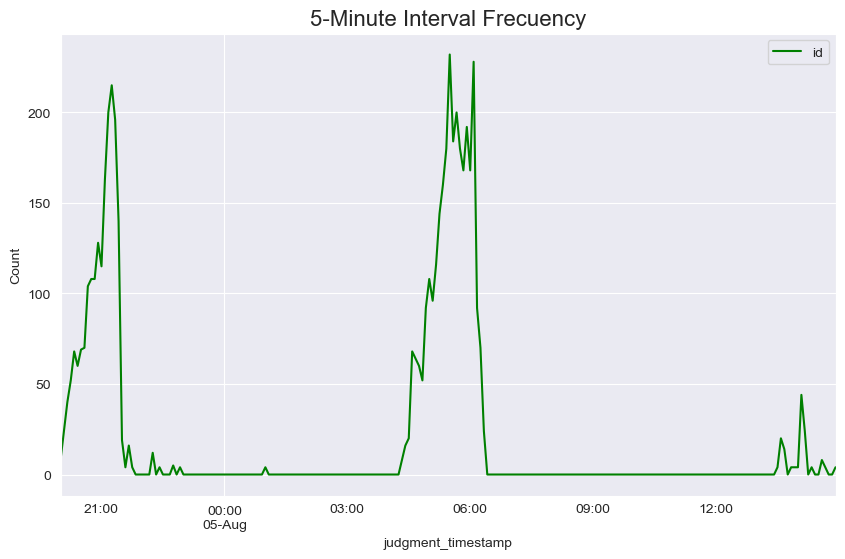

In [20]:
df_ts.resample('5T').count().plot(y='id', figsize=(10,6), color='g')
plt.title('5-Minute Interval Frecuency', fontsize=16)
plt.ylabel('Count')
plt.show();

#  Feature Extraction: Bag of Words

In [21]:
# Reset Index
df_ts.reset_index(drop=True, inplace=True)

In [22]:
text = df_ts['text']
text

0       RT @nowthisnews: Rep. Trey Radel (R- #FL) slam...
1       VIDEO - #Obamacare:  Full of Higher Costs and ...
2       Please join me today in remembering our fallen...
3       RT @SenatorLeahy: 1st step toward Senate debat...
4       .@amazon delivery #drones show need to update ...
                              ...                        
4995    I applaud Governor PerryÛªs recent decision t...
4996    Today, I voted in favor of H.R. 5016 - Financi...
4997    (Taken from posted WOKV interview)   Congressm...
4998    Join me next week for a town hall in Ocala! I'...
4999    Foreign Affairs Committee Hearing on Syria. I ...
Name: text, Length: 5000, dtype: object

In [23]:
type(df_ts['text'])

pandas.core.series.Series

## Clean Text Data

In [46]:
# Instantiate an object cv by calling a method named as CountVectorzer()
# Tokenizer to remove unwanted elements from out data like symbols and numbers

token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase = True, stop_words = 'english', ngram_range = (1, 1),
                     tokenizer = token.tokenize, dtype=np.float32)
cv

CountVectorizer(dtype=<class 'numpy.float32'>, stop_words='english',
                tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[a-zA-Z0-9]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)

In [48]:
text_counts= cv.fit_transform(text)
text_counts

C:\Users\ariel\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


<5000x17739 sparse matrix of type '<class 'numpy.float32'>'
	with 92905 stored elements in Compressed Sparse Row format>

In [49]:
# Train the dataset by calling a fit_transform() method
X = cv.fit_transform(text).toarray()

# Display the rows and colums
X.shape

(5000, 17739)

In [50]:
# Split the dataset into training and testing parts
X_train, X_test, y_train, y_test = train_test_split(text_counts, text, test_size=0.3, random_state=42)

In [51]:
# Display the rows and columns (dimensions) of an unsplitted dataset
print('Total number of rows and columns for the complete dataset: ', X.shape)

# Display the rows and columns (dimensions) of the splitted dataset
print('Number of rows and columns after splitting dataset: ', X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Total number of rows and columns for the complete dataset:  (5000, 17739)
Number of rows and columns after splitting dataset:  (3500, 17739) (1500, 17739) (3500,) (1500,)


In [52]:
# Instantiate an object model by calling a method MultinomialNB()
model = MultinomialNB()

In [53]:
# Train the model by calling a method fit()
model.fit(X_train,y_train)

MultinomialNB()

In [54]:
# Call predict() method
y_pred = model.predict(X_test)

In [55]:
# Instantiate a the classification report
report_cv = classification_report(y_test, y_pred)

C:\Users\ariel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ariel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ariel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ariel\anaconda3\lib\site-packages\sklearn\metrics\_cla

In [56]:
# Display the values of the report
print(report_cv)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [57]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
CF = confusion_matrix(y_test, y_pred)

print(CF)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

C:\Users\ariel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ariel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy: 0.0
Precision: 0.0
Recall: 0.0


## TF-IDF

In [42]:
# Create an object 'tfidf' by calling a method TfidfVectorizer()
tfidf = sk_txt.TfidfVectorizer(stop_words = 'english', dtype=np.float32)

# Train the dataset by calling a method fit_tranform() 
X_tfidf = tfidf.fit_transform(text).toarray()

In [43]:
# Split the dataset into training and testing parts
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, text, test_size = 0.30, random_state=42)

In [44]:
# Display the rows and columns (dimensions) of an unsplitted dataset
print('Total number of rows and columns for the complete dataset: ', X.shape)

# Display the rows and columns (dimensions) of the splitted dataset
print('Number of rows and columns after splitting dataset: ', X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Total number of rows and columns for the complete dataset:  (5000, 17739)
Number of rows and columns after splitting dataset:  (3500, 17951) (1500, 17951) (3500,) (1500,)


In [37]:
# Instantiate an object model by calling a method MultinomialNB()
model_tfidf = MultinomialNB()

In [38]:
# Train the model by calling a method fit()
model_tfidf.fit(X_train, y_train)

MultinomialNB()

In [39]:
# Call predict() method
y_pred = model_tfidf.predict(X_test)

In [40]:
# Instantiate a the classification report
report_tfidf = classification_report(y_test, y_pred)

C:\Users\ariel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ariel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ariel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ariel\anaconda3\lib\site-packages\sklearn\metrics\_cla

In [41]:
# Display the values of the report
print(report_tfidf)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

